In [35]:
# -*- coding: utf-8 -*-

"""
Created on Wed Sep 14 12:20:13 2022

@author: bonotto
"""


'''
###############################################################################
###############################################################################
'''
### CLEAR WRKSPACE
def clear_all():
    """Clears all the variables from the workspace of the spyder application."""
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]
if __name__ == "__main__":
    clear_all()
    # insert here your code

clear_all
'''
###############################################################################
###############################################################################
'''



###############################################################################

import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# Helper libraries
import numpy as np
import pandas as pd
from numpy import matlib as mb
import matplotlib.pyplot as plt
import matplotlib

import scipy.io

# !pip install seaborn
import seaborn as sns
sns.set_style("darkgrid")

# !pip install seaborn

import random

import matplotlib.lines as mlines
from multiprocessing import Pool

# pip install mat4py

# Load the TensorBoard notebook extension.
# %load_ext tensorboard
from datetime import datetime
from packaging import version

# !pip install --upgrade --force-reinstall tensorflow
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# import tensorflow_addons as tfa

# !pip install tensorflow
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import mixed_precision


print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

# import tensorboard
# tensorboard.__version__
# Clear any logs from previous runs
# !rm -rf ./logs/

# C:\Users\bonotto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip'

# !pip install sklearn
# !pip install --upgrade --force-reinstall scikeras


# from scikeras.wrappers import KerasRegressor

from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# from sklearn.externals import joblib
import scipy.interpolate as interp

from sklearn.metrics import r2_score


from mpl_toolkits import mplot3d

import matplotlib.tri as tri
import matplotlib.cm as cm

# !pip install --upgrade --force-reinstall scipy
from scipy import interpolate
from scipy.interpolate import interp2d
from scipy import signal
import scipy.ndimage
import time

try:
  import mat73
except:
  !pip install mat73
  import mat73




Num GPUs Available:  0
TensorFlow version:  2.14.0
time: 20.6 s (started: 2023-10-08 18:42:15 +02:00)


In [36]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

zsh:1: command not found: nvidia-smi
time: 105 ms (started: 2023-10-08 18:42:36 +02:00)


In [37]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    pass

time: 1.72 ms (started: 2023-10-08 18:42:36 +02:00)


In [38]:
# policy = mixed_precision.Policy('float32') # float32, mixed_float16
# mixed_precision.set_global_policy(policy)
# print('Compute dtype: %s' % policy.compute_dtype)
# print('Variable dtype: %s' % policy.variable_dtype)

time: 179 µs (started: 2023-10-08 18:42:36 +02:00)


In [39]:
import os
os.getcwd()

'/Users/matte/Dropbox/PhD/RESEARCH_ACTIVITY/ML/Equilibrium_ML/Physics_Informed_AI_plasma_equilibrium'

time: 1.53 ms (started: 2023-10-08 18:42:36 +02:00)


In [40]:
# !pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 741 µs (started: 2023-10-08 18:42:36 +02:00)


In [41]:

try:
    filename = r'./gdrive/MyDrive/Colab_Notebooks/data_for_PnaNet_sample.mat'
    # filename = r'./gdrive/MyDrive/Colab_Notebooks/data_for_PnaNet.mat'
    mat = scipy.io.loadmat(filename)
except:
    filename = '/Users/matte/Library/CloudStorage/GoogleDrive-matteobonotto90@gmail.com/My Drive/Colab_Notebooks/ITER_like_equilibrium_dataset.mat'
    # filename = '/Users/matte/Library/CloudStorage/GoogleDrive-matteobonotto90@gmail.com/My Drive/Colab_Notebooks/ITER_like_equilibrium_dataset_sample.mat'
    mat = scipy.io.loadmat(filename)


time: 3.94 s (started: 2023-10-08 18:42:36 +02:00)


In [42]:
DB_meas_Bpickup_test_ConvNet        = mat['DB_meas_Bpickup_test_ConvNet']
DB_psi_pixel_test_ConvNet           = mat['DB_psi_pixel_test_ConvNet']
DB_res_RHS_pixel_test_ConvNet       = mat['DB_res_RHS_pixel_test_ConvNet']
DB_Jpla_pixel_test_ConvNet          = mat['DB_Jpla_pixel_test_ConvNet']
DB_coils_curr_test_ConvNet          = mat['DB_coils_curr_test_ConvNet']
RR_pixels                           = mat['RR_pixels']
ZZ_pixels                           = mat['ZZ_pixels']
DB_separatrix_200_test_ConvNet      = mat['DB_separatrix_200_test_ConvNet']
XP_YN                               = mat['XP_YN']
DB_f_test_ConvNet                   = mat['DB_f_test_ConvNet']
DB_p_test_ConvNet                   = mat['DB_p_test_ConvNet']



ind_case = 30000
ind_case = DB_meas_Bpickup_test_ConvNet.shape[0]
print(str(ind_case))
# qq = (np.reshape(DB_separatrix_200_test_ConvNet,(DB_separatrix_200_test_ConvNet.shape[0],2,200)))
# print(DB_separatrix_200_test_ConvNet.shape)
# separatrix = np.stack((DB_separatrix_200_test_ConvNet[:, :200],
#                         DB_separatrix_200_test_ConvNet[:, 200:]), axis=-1)


# qqq = DB_separatrix_200_test_ConvNet[0, 200:]

DB_meas_Bpickup_test_ConvNet  = DB_meas_Bpickup_test_ConvNet[:ind_case,:]
DB_psi_pixel_test_ConvNet     = DB_psi_pixel_test_ConvNet[:ind_case,:]
DB_res_RHS_pixel_test_ConvNet = DB_res_RHS_pixel_test_ConvNet[:ind_case,:]
DB_Jpla_pixel_test_ConvNet    = DB_Jpla_pixel_test_ConvNet[:ind_case,:]
DB_coils_curr_test_ConvNet    = DB_coils_curr_test_ConvNet[:ind_case,:]
DB_f_test_ConvNet             = DB_f_test_ConvNet[:ind_case,:]
DB_p_test_ConvNet             = DB_p_test_ConvNet[:ind_case,:]


X_data_load = np.column_stack((DB_meas_Bpickup_test_ConvNet,
                               DB_coils_curr_test_ConvNet,
                               DB_f_test_ConvNet,
                               DB_p_test_ConvNet
                               ))

y_data_load = DB_psi_pixel_test_ConvNet
res_RHS_pixel_data_load = DB_res_RHS_pixel_test_ConvNet

n_dim = y_data_load.shape[1]

81986
time: 133 ms (started: 2023-10-08 18:42:40 +02:00)


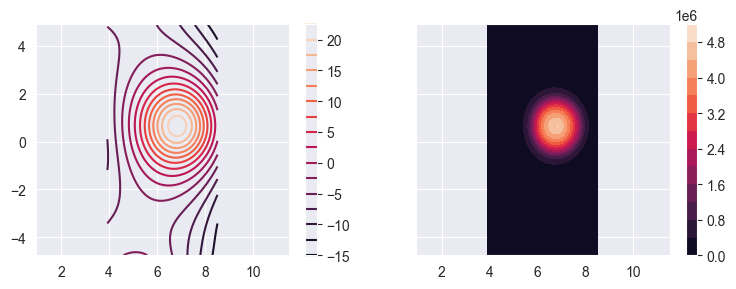

time: 344 ms (started: 2023-10-08 18:42:40 +02:00)


In [43]:
for i in range(0,1):
    ind_plot = np.random.randint(0,DB_Jpla_pixel_test_ConvNet.shape[0],1)[0]
    fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
    img = axs[0].contour(RR_pixels,ZZ_pixels,DB_psi_pixel_test_ConvNet[ind_plot,:,:],15)
    axs[0].axis('equal')
    fig.colorbar(img)
    img = axs[1].contourf(RR_pixels,ZZ_pixels,DB_Jpla_pixel_test_ConvNet[ind_plot,:,:],15)
    axs[1].axis('equal')
    fig.colorbar(img)




In [44]:
def fun_contourf_sol(z,RR,ZZ):
    plt.figure()
    plt.contourf(RR, ZZ, z, 20)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    return


def fun_contour_sol(z,RR,ZZ):
    plt.figure()
    plt.contour(RR, ZZ, z, 20)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    return


def fun_contour_compare_sol(z_ref,z,RR,ZZ):
    l1 = mlines.Line2D([], [], label='DNN')
    l2 = mlines.Line2D([], [], color='black', label='FRIDA')

    plt.figure()
    plt.contour(RR, ZZ, z, 10)
    plt.colorbar()
    plt.contour(RR, ZZ, z_ref, 10, colors = 'black', linestyles = 'dashed')
    plt.legend(handles=[l1, l2])
    plt.axis('equal')
    plt.show()
    return

time: 851 µs (started: 2023-10-08 18:42:40 +02:00)


In [45]:
X_data = X_data_load
y_data = y_data_load



### selec a portion of all the available equilibria
# ind_subsample = np.random.randint(0,X_data.shape[0],15000)
ind_subsample = np.random.randint(0,X_data.shape[0],X_data.shape[0])
ind_subsample = np.arange(0,X_data.shape[0])
# ind_subsample = np.arange(0,30000)
# ind_subsample = np.random.randint(0,X_data.shape[0],1000)

ind_probes = np.arange(0,X_data.shape[1])

X = X_data[ind_subsample,:]
y = y_data[ind_subsample,:,:]

res_RHS_pixel = res_RHS_pixel_data_load[ind_subsample,:,:]
res_RHS_D = DB_res_RHS_pixel_test_ConvNet[ind_subsample,:]

### Standardize input data
scaler = StandardScaler()
X = scaler.fit_transform(X)
np.mean(X[:,0])

### Train-test split
ID = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X,
    y,
    ID,
    test_size=.2,
    random_state=42)

res_RHS_pixel_train = res_RHS_pixel[np.int_(id_train),:,:]
res_RHS_D_train = res_RHS_D[np.int_(id_train),:]

res_RHS_pixel_test = res_RHS_pixel[np.int_(id_test),:,:]
res_RHS_D_test = res_RHS_D[np.int_(id_test),:]


time: 41.9 s (started: 2023-10-08 18:42:40 +02:00)


In [46]:
def sample_random_subgrids(seed=None):
  delta_r_min = (RR_pixels.max()-RR_pixels.min())/3
  delta_r_max = RR_pixels.max()-RR_pixels.min()

  delta_z_min = (ZZ_pixels.max()-ZZ_pixels.min())/6
  delta_z_max = ZZ_pixels.max()-ZZ_pixels.min()

  if seed is not None:
    np.random.seed(seed)
  delta_r = np.random.uniform(delta_r_min,delta_r_max,1)
  r0 = np.random.uniform(RR_pixels.min(),RR_pixels.min()+delta_r_max-delta_r,1)

  delta_z = np.random.uniform(delta_z_min,delta_z_max,1)
  z0 = np.random.uniform(ZZ_pixels.min(),ZZ_pixels.min()+delta_z_max-delta_z,1)

  rr = np.linspace(r0,r0+delta_r,64)
  zz = np.linspace(z0,z0+delta_z,64)

  rr_grid, zz_grid = np.meshgrid(rr,zz,indexing='xy')

  return rr_grid, zz_grid


def get_box_from_grid(rr_grid, zz_grid):
  return np.array([
      [rr_grid.min(), zz_grid.min()],
      [rr_grid.max(), zz_grid.min()],
      [rr_grid.max(), zz_grid.max()],
      [rr_grid.min(), zz_grid.max()],
      [rr_grid.min(), zz_grid.min()]])

time: 5.74 ms (started: 2023-10-08 18:43:22 +02:00)


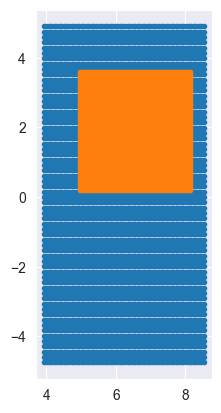

time: 243 ms (started: 2023-10-08 18:43:22 +02:00)


In [47]:
for i in range(1):
  rr_grid, zz_grid, = sample_random_subgrids()
  plt.figure()
  plt.scatter(RR_pixels.ravel(), ZZ_pixels.ravel(), marker='.')
  plt.scatter(rr_grid.ravel(), zz_grid.ravel(), marker='.')
  ax = plt.gca()
  ax.set_aspect('equal', 'box')
  plt.show()


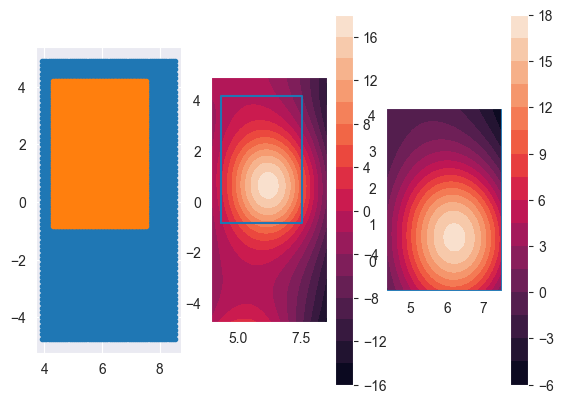

time: 501 ms (started: 2023-10-08 18:43:23 +02:00)


In [48]:
from scipy.interpolate import RegularGridInterpolator

def interp_fun(f,RR_pixels,ZZ_pixels,rr_grid,zz_grid):
  x_pts = RR_pixels[0,:].ravel()
  y_pts = ZZ_pixels[:,0].ravel()
  interp_func = RegularGridInterpolator((x_pts, y_pts), f.T)
  f_int = interp_func(np.column_stack((
        rr_grid.reshape(-1, 1),
        zz_grid.reshape(-1, 1),
        )),method='quintic').reshape(rr_grid.shape)
  return f_int

f = y_train[0,:,:]
rr_grid, zz_grid = sample_random_subgrids(seed=100)
box = get_box_from_grid(rr_grid, zz_grid)
f_grid = interp_fun(f,RR_pixels,ZZ_pixels,rr_grid, zz_grid)

fig,ax = plt.subplots(1,3)
ax[0].scatter(RR_pixels.ravel(), ZZ_pixels.ravel(), marker='.')
ax[0].scatter(rr_grid.ravel(), zz_grid.ravel(), marker='.')
ax[0].set_aspect('equal', 'box')

im = ax[1].contourf(RR_pixels, ZZ_pixels, f, 20)
ax[1].set_aspect('equal', 'box')
ax[1].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[1])

im = ax[2].contourf(rr_grid, zz_grid, f_grid, 20)
ax[2].set_aspect('equal', 'box')
ax[2].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[2])

plt.show()

In [49]:
y_train_old = y_train

time: 374 µs (started: 2023-10-08 18:43:23 +02:00)


In [50]:
np.random.seed(42)

ind_rand_all = np.random.randint(0,y_train.shape[0],y_train.shape[0])

ind_all_domain = ind_rand_all[:y_train.shape[0]//2]
ind_super_res = ind_rand_all[y_train.shape[0]//2:]

ind_all_domain = ind_rand_all[np.random.randint(0,y_train.shape[0],35000)]
ind_super_res = ind_rand_all[np.random.randint(0,y_train.shape[0],35000)]

# ind_all_domain = ind_rand_all[:y_train.shape[0]]
# ind_super_res = ind_rand_all[y_train.shape[0]//2:y_train.shape[0]//2+1]

# ind_all_domain = ind_rand_all[:1]
# ind_super_res = ind_rand_all[1:40000]

n_all_domain = ind_all_domain.shape[0]
n_super_res = ind_super_res.shape[0]

y_train_all_domain = y_train[ind_all_domain,:,:]
X_train_all_domain = X_train[ind_all_domain,:]
res_RHS_pixel_train_all_domain = res_RHS_pixel_train[ind_all_domain,:,:]

f_for_super_res = y_train[ind_super_res,:,:]
rhs_for_super_res = res_RHS_D_train[ind_super_res,:,:]

X_train_super_res = X_train[ind_super_res,:]
y_train_super_res = np.zeros((n_super_res,64,64))
rhs_train_super_res = np.zeros_like(y_train_super_res)
RR_grid_super_res = np.zeros_like(y_train_super_res)
ZZ_grid_super_res = np.zeros_like(y_train_super_res)

time: 13.9 s (started: 2023-10-08 18:43:23 +02:00)


In [51]:
X_train_super_res.shape

(35000, 403)

time: 7.02 ms (started: 2023-10-08 18:43:37 +02:00)


In [52]:
n_all_domain

35000

time: 997 µs (started: 2023-10-08 18:43:37 +02:00)


In [53]:
from utils import task
import sys, importlib
importlib.reload(sys.modules['utils'])
from utils import task

time: 7.83 ms (started: 2023-10-08 18:43:37 +02:00)


In [54]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pool = Pool(processes=6)
results = [pool.apply_async(task, [f_i,rhs_i,RR_pixels,ZZ_pixels,64,64]) for \
           f_i,rhs_i in zip(f_for_super_res,rhs_for_super_res)]
t_start = time.time()
for idx, val in enumerate(results):
  rr_grid, zz_grid, f_grid, rhs_grid = val.get()
  RR_grid_super_res[idx,:,:] = rr_grid
  ZZ_grid_super_res[idx,:,:] = zz_grid
  y_train_super_res[idx,:,:] = f_grid
  rhs_train_super_res[idx,:,:] = rhs_grid

t_elapsed = time.time() - t_start
print(f't_elapsed = {t_elapsed}, time_per_step = {t_elapsed/n_super_res}')

t_elapsed = 19.40581512451172, time_per_step = 0.0005544518607003349
time: 20.6 s (started: 2023-10-08 18:43:58 +02:00)


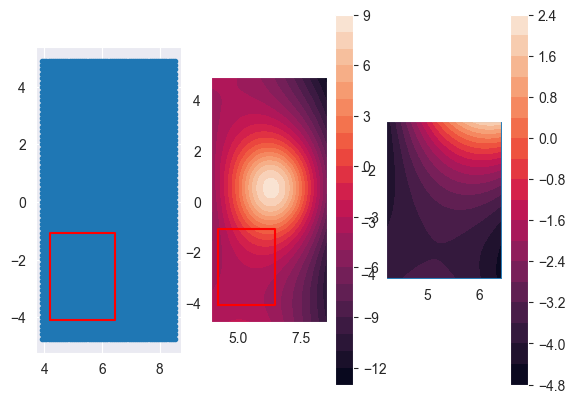

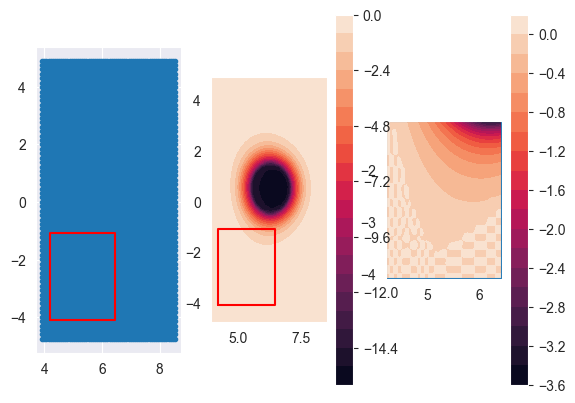

time: 1.24 s (started: 2023-10-08 18:44:18 +02:00)


In [55]:

f = f_for_super_res[0,:,:]
rhs = rhs_for_super_res[0,:,:]

rr_grid, zz_grid, f_grid, rhs_grid = task(f,rhs,RR_pixels,ZZ_pixels)
box = get_box_from_grid(rr_grid, zz_grid)

fig,ax = plt.subplots(1,3)
ax[0].scatter(RR_pixels.ravel(), ZZ_pixels.ravel(), marker='.')
# ax[0].scatter(rr_grid.ravel(), zz_grid.ravel(), marker='.')
ax[0].plot(box[:,0],box[:,1],c='r')
ax[0].set_aspect('equal', 'box')

im = ax[1].contourf(RR_pixels, ZZ_pixels, f, 20)
ax[1].set_aspect('equal', 'box')
ax[1].plot(box[:,0],box[:,1],c='r')
plt.colorbar(im,ax=ax[1])

im = ax[2].contourf(rr_grid, zz_grid, f_grid, 20)
ax[2].set_aspect('equal', 'box')
ax[2].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[2])

plt.show()


fig,ax = plt.subplots(1,3)
ax[0].scatter(RR_pixels.ravel(), ZZ_pixels.ravel(), marker='.')
# ax[0].scatter(rr_grid.ravel(), zz_grid.ravel(), marker='.')
ax[0].plot(box[:,0],box[:,1],c='r')
ax[0].set_aspect('equal', 'box')

im = ax[1].contourf(RR_pixels, ZZ_pixels, rhs, 20)
ax[1].set_aspect('equal', 'box')
ax[1].plot(box[:,0],box[:,1],c='r')
plt.colorbar(im,ax=ax[1])

im = ax[2].contourf(rr_grid, zz_grid, rhs_grid, 20)
ax[2].set_aspect('equal', 'box')
ax[2].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[2])

plt.show()

In [56]:
# scaler_r = StandardScaler()
# scaler_z = StandardScaler()

# scaler_r.fit(RR_pixels.reshape(-1,1))
# scaler_z.fit(ZZ_pixels.reshape(-1,1))

# RR_pixels_scaled = scaler_r.transform(RR_pixels.reshape(-1,1)).reshape(RR_pixels.shape)
# ZZ_pixels_scaled = scaler_z.transform(ZZ_pixels.reshape(-1,1)).reshape(RR_pixels.shape)

# RR_pixels_scaled = np.tile(RR_pixels_scaled,(n_all_domain,1,1))
# ZZ_pixels_scaled = np.tile(ZZ_pixels_scaled,(n_all_domain,1,1))

# for i in range(RR_grid_super_res.shape[0]):
#     if i//5000 == i/5000:
#         print(f'... processed {i} of {RR_grid_super_res.shape[0]}')
#     RR_grid_super_res[i,:,:] = scaler_r.transform(RR_grid_super_res[i,:,:].reshape(-1,1)).reshape(RR_grid_super_res[i,:,:].shape)
#     ZZ_grid_super_res[i,:,:] = scaler_z.transform(ZZ_grid_super_res[i,:,:].reshape(-1,1)).reshape(ZZ_grid_super_res[i,:,:].shape)


time: 654 µs (started: 2023-10-08 18:44:48 +02:00)


In [57]:
RR_grid_all_domain = np.tile(RR_pixels,(n_all_domain,1,1))
ZZ_grid_all_domain = np.tile(ZZ_pixels,(n_all_domain,1,1))

time: 591 ms (started: 2023-10-08 18:44:48 +02:00)


In [58]:
box.shape

(5, 2)

time: 2.45 ms (started: 2023-10-08 18:44:49 +02:00)


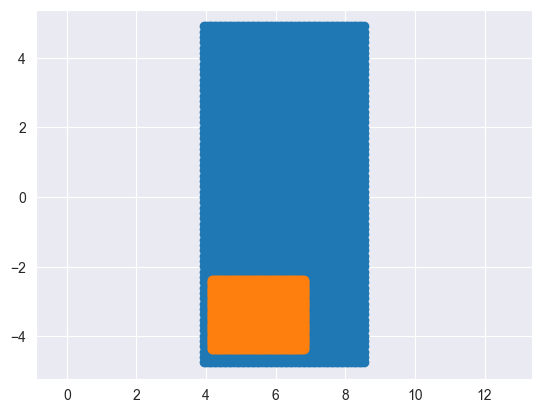

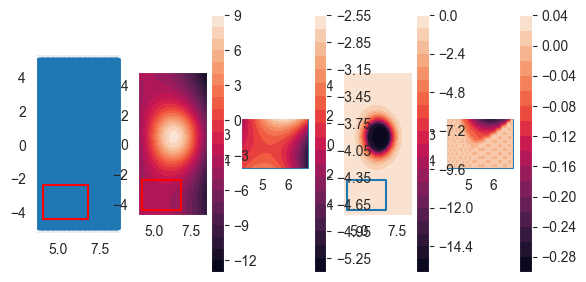

time: 528 ms (started: 2023-10-08 18:44:50 +02:00)


In [59]:


plt.figure()
plt.scatter(RR_grid_all_domain[0,:,:].ravel(),ZZ_grid_all_domain[0,:,:].ravel())
ind = 0
plt.scatter(RR_grid_super_res[ind,:,:].ravel(),ZZ_grid_super_res[ind,:,:].ravel())
plt.axis('equal')

box = get_box_from_grid(RR_grid_super_res[ind,:,:], ZZ_grid_super_res[ind,:,:])

fig,ax = plt.subplots(1,5)
ax[0].scatter(RR_grid_all_domain[0,:,:].ravel(),ZZ_grid_all_domain[0,:,:].ravel())
# ax[0].scatter(rr_grid.ravel(), zz_grid.ravel(), marker='.')
ax[0].plot(box[:,0],box[:,1],c='r')
ax[0].set_aspect('equal', 'box')

im = ax[1].contourf(RR_grid_all_domain[0,:,:], ZZ_grid_all_domain[0,:,:], f_for_super_res[ind,:,:], 20)
ax[1].set_aspect('equal', 'box')
ax[1].plot(box[:,0],box[:,1],c='r')
plt.colorbar(im,ax=ax[1])

im = ax[2].contourf(RR_grid_super_res[0,:,:], ZZ_grid_super_res[0,:,:], y_train_super_res[ind,:,:], 20)
ax[2].set_aspect('equal', 'box')
ax[2].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[2])

im = ax[3].contourf(RR_grid_all_domain[0,:,:], ZZ_grid_all_domain[0,:,:], rhs_for_super_res[ind,:,:], 20)
ax[3].set_aspect('equal', 'box')
ax[3].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[3])

im = ax[4].contourf(RR_grid_super_res[0,:,:], ZZ_grid_super_res[0,:,:], rhs_train_super_res[ind,:,:], 20)
ax[4].set_aspect('equal', 'box')
ax[4].plot(box[:,0],box[:,1])
plt.colorbar(im,ax=ax[4])

In [61]:
# Stack together all_domain + super_res datasets

# y_train = np.row_stack([
#     # y_train_all_domain,
#     y_train_super_res
#     ])[:,::2,::2]

# X_train = np.row_stack([
#     # X_train_all_domain,
#     X_train_super_res
#     ])

# res_RHS_pixel_train = np.row_stack([
#     # res_RHS_pixel_train_all_domain,
#     rhs_train_super_res
#     ])[:,::2,::2]

# RR_pixel_train = np.row_stack([
#     # RR_grid_all_domain,
#     RR_grid_super_res
#     ])[:,::2,::2]

# ZZ_pixel_train = np.row_stack([
#     # ZZ_grid_all_domain,
#     ZZ_grid_super_res
#     ])[:,::2,::2]


y_train = y_train_all_domain#[:,::2,::2]
X_train = X_train_all_domain
res_RHS_pixel_train = res_RHS_pixel_train_all_domain#[:,::2,::2]
RR_pixel_train = RR_grid_all_domain#[:,::2,::2]
ZZ_pixel_train = ZZ_grid_all_domain#[:,::2,::2]

# y_train = y_train_super_res[:,::2,::2]
# X_train = X_train_super_res
# res_RHS_pixel_train = rhs_train_super_res[:,::2,::2]
# RR_pixel_train = RR_grid_super_res[:,::2,::2]
# ZZ_pixel_train = ZZ_grid_super_res[:,::2,::2]


time: 403 µs (started: 2023-10-08 18:45:07 +02:00)


In [62]:
print(X_train.shape,
      y_train.shape,
      res_RHS_pixel_train[:,1:-1,1:-1].shape,
      RR_pixel_train.shape,
      ZZ_pixel_train.shape,
      )

(35000, 403) (35000, 64, 64) (35000, 62, 62) (35000, 64, 64) (35000, 64, 64)
time: 377 µs (started: 2023-10-08 18:45:08 +02:00)


In [63]:

Laplace_kernel = np.zeros((y_train.shape[0],3,3))
Df_dr_kernel = np.zeros((y_train.shape[0],3,3))

for i in range(y_train.shape[0]):
    if i//5000 == i/5000:
        print(f'... processed {i} of {y_train.shape[0]}')

    hr = RR_pixel_train[i,1,2] - RR_pixel_train[i,1,1]
    hz = ZZ_pixel_train[i,2,1] - ZZ_pixel_train[i,1,1] 
    alfa = -2*(hr**2 + hz**2)
    Laplace_kernel_i = np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 1, hz**2/alfa], [0, hr**2/alfa, 0]))
    Df_dr_kernel_i = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2)

    Laplace_kernel[i,:,:] = Laplace_kernel_i
    Df_dr_kernel[i,:,:] = Df_dr_kernel_i

... processed 0 of 35000
... processed 5000 of 35000
... processed 10000 of 35000
... processed 15000 of 35000
... processed 20000 of 35000
... processed 25000 of 35000
... processed 30000 of 35000
time: 536 ms (started: 2023-10-08 18:45:12 +02:00)


In [29]:
# ### Print some info
# print('N sample train ->', X_train.shape[0])
# print('N sample test  ->', X_test.shape[0])

# n_output = y_train.shape[1]
# n_input = X_train.shape[1]

# print('data_X_train.shape =', X_train.shape)
# print('data_y_train.shape =', y_train.shape)


# # Convert input to tensor

# # DTYPE = 'float64'
# DTYPE = 'float32'
# X_train = tf.convert_to_tensor(X_train, dtype=(DTYPE))
# y_train = tf.convert_to_tensor(y_train, dtype=(DTYPE))

# X_test = tf.convert_to_tensor(X_test, dtype=(DTYPE))
# y_test = tf.convert_to_tensor(y_test, dtype=(DTYPE))

# res_RHS_D_train = tf.convert_to_tensor(res_RHS_D_train, dtype=(DTYPE))
# res_RHS_pixel_train = tf.convert_to_tensor(res_RHS_pixel_train, dtype=(DTYPE))

# RR_pixel_train = tf.convert_to_tensor(RR_pixel_train, dtype=(DTYPE))
# ZZ_pixel_train = tf.convert_to_tensor(ZZ_pixel_train, dtype=(DTYPE))

# Laplace_kernel = tf.convert_to_tensor(Laplace_kernel, dtype=(DTYPE))
# Df_dr_kernel = tf.convert_to_tensor(Df_dr_kernel, dtype=(DTYPE))

time: 390 µs (started: 2023-10-06 15:18:51 +02:00)


In [64]:
dict_save = {
    'X_train':X_train,
    'y_train':y_train,
    'res_RHS_pixel_train':res_RHS_pixel_train[:,1:-1,1:-1],
    'RR_pixel_train':RR_pixel_train,
    'ZZ_pixel_train':ZZ_pixel_train,
    'Laplace_kernel':Laplace_kernel,
    'Df_dr_kernel':Df_dr_kernel,
             }
# scipy.io.savemat('Dataset_NeuralOpt_super_res_only_32x32.mat',dict_save)
scipy.io.savemat('Dataset_NeuralOpt_all_domain_only_32x32.mat',dict_save)

dict_save = {
    'RR_pixels':RR_pixels[::2,::2],
    'ZZ_pixels':ZZ_pixels[::2,::2],
             }
scipy.io.savemat('data_geo_Dataset_NeuralOpt_super_res_32x32.mat',dict_save)

time: 19.5 s (started: 2023-10-08 18:45:44 +02:00)


In [ ]:
RR_pixel_train[:,::2,::2][:,1,2] - RR_pixel_train[:,::2,::2][:,1,1]

<tf.Tensor: shape=(35000,), dtype=float32, numpy=
array([0.05188417, 0.05249596, 0.07414341, ..., 0.08093786, 0.08742905,
       0.05007839], dtype=float32)>

time: 130 ms (started: 2023-10-05 17:10:02 +02:00)


In [ ]:
Df_dr_kernel[-3:,:,:]

<tf.Tensor: shape=(3, 3, 3), dtype=float32, numpy=
array([[[-0.       , -0.       , -0.       ],
        [-0.0086228, -0.       ,  0.0086228],
        [-0.       , -0.       , -0.       ]],

       [[-0.       , -0.       , -0.       ],
        [-0.0085281, -0.       ,  0.0085281],
        [-0.       , -0.       , -0.       ]],

       [[-0.       , -0.       , -0.       ],
        [-0.0057608, -0.       ,  0.0057608],
        [-0.       , -0.       , -0.       ]]], dtype=float32)>

time: 2.62 ms (started: 2023-10-05 17:10:02 +02:00)


In [3]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train,
     y_train,
     res_RHS_pixel_train[:,1:-1,1:-1],
    #  res_RHS_pixel_train[1:,:,:],
     RR_pixel_train,
     ZZ_pixel_train,
     Laplace_kernel,
     Df_dr_kernel,
     )).shuffle(42).batch(batch_size=1024)

# tf.data.Dataset.save(train_ds, 'tf_Dataset_NeuralOpt_super_res_only_64x64.data')
tf.data.Dataset.save(train_ds, 'tf_Dataset_NeuralOpt_all_domain_only_64x64.data')

dict_save = {
    'RR_pixels':RR_pixels[::2,::2],
    'ZZ_pixels':ZZ_pixels[::2,::2],
             }
scipy.io.savemat('data_geo_Dataset_NeuralOpt_super_res_64x64.mat',dict_save)

NameError: name 'X_train' is not defined

In [33]:
# train_ds = tf.data.Dataset.from_tensor_slices(
#     (X_train[1:,:],
#      y_train[1:,:,:],
#      res_RHS_pixel_train[:,1:-1,1:-1][1:,:,:],
#     #  res_RHS_pixel_train[1:,:,:],
#      RR_pixel_train[1:,:,:],
#      ZZ_pixel_train[1:,:,:],
#      Laplace_kernel[1:,:,:],
#      Df_dr_kernel[1:,:,:],
#      )).shuffle(42).batch(batch_size=512)

# tf.data.Dataset.save(train_ds, 'tf_Dataset_NeuralOpt_super_res_32x32.data')

# dict_save = {
#     'RR_pixels':RR_pixels[::2,::2],
#     'ZZ_pixels':ZZ_pixels[::2,::2],
#              }
# scipy.io.savemat('data_geo_Dataset_NeuralOpt_super_res_32x32.mat',dict_save)

time: 1.31 s (started: 2023-10-04 16:40:23 +02:00)


In [55]:
x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds = iter(train_ds).next()
for x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds in train_ds:
    pass
hr = RR_ds[:,1,2] - RR_ds[:,1,1]
hr

<tf.Tensor: shape=(52,), dtype=float32, numpy=
array([0.0539096 , 0.03668785, 0.04048574, 0.07646191, 0.0797658 ,
       0.0787884 , 0.06720209, 0.06681693, 0.0485419 , 0.07200682,
       0.05759656, 0.08090794, 0.06312764, 0.0593437 , 0.04852927,
       0.0409193 , 0.05212545, 0.0377382 , 0.04591906, 0.07908106,
       0.04876906, 0.05196476, 0.03773773, 0.05582869, 0.0451349 ,
       0.07566392, 0.05944741, 0.08095527, 0.06692529, 0.04834801,
       0.04688966, 0.0372535 , 0.05135214, 0.07216263, 0.06617844,
       0.0525682 , 0.04376656, 0.06427312, 0.06010699, 0.04729247,
       0.07937479, 0.05957377, 0.08107018, 0.06378806, 0.03764856,
       0.04090714, 0.08023512, 0.07984877, 0.05440217, 0.04093337,
       0.05924153, 0.04273713], dtype=float32)>

time: 579 ms (started: 2023-10-03 19:46:41 +02:00)


---
# Test model

In [34]:
'''
###############################################################################
### Physics-Informed Neural Operator
'''
DTYPE = 'float32'

def conv2D_Norm_activation(x,filters,kernel_size,activation='gelu'):
    x = layers.Conv2D(filters=filters ,
                      kernel_size=kernel_size,
                      strides=1,
                      padding='same',
                      dtype = DTYPE)(x)
    x = layers.BatchNormalization()(x)
    # x = tf.keras.activations.relu(x)
    x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.gelu(x)
    return x

n_grid = 32

def PlaNet_Equil_Neural_Opt():
    input_shape_fun = n_input
    input_query_r = n_grid
    input_query_z = n_grid
    neuron_FC = 2048
    n_w = 8 if n_grid == 64 else 4
    n_h = 8 if n_grid == 64 else 4
    n_c = int(neuron_FC/(n_h*n_w))
    interpolation = 'nearest'
    interpolation = 'bilinear'

    input_fun = tf.keras.Input(shape=(input_shape_fun,), name='function') # meas + active currents (+ profiles)
    input_query_RR = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='R_grid_query') # input coordinates (query pts)
    input_query_ZZ = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='Z_grid_query') # input coordinates (query pts)

    inputs = [input_fun, input_query_RR, input_query_ZZ]

    # Branch net
    x = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(input_fun)

    x = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)

    x = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)

    out_branch = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)


    # Trunk net
    # x_r = input_query_RR
    x_r = layers.BatchNormalization()(input_query_RR)
    for i in range(1):
        # x_r = input_query_RR if i == 0 else x_r
        x_r = conv2D_Norm_activation(x_r,filters=i+1,kernel_size=(3, 3))
        x_r = layers.MaxPooling2D(pool_size=(2,2))(x_r)

    # x_z = input_query_ZZ
    x_z = layers.BatchNormalization()(input_query_ZZ)
    for i in range(1):
        # x_z = input_query_ZZ if i == 0 else x_z
        x_z = conv2D_Norm_activation(x_z,filters=i+1,kernel_size=(3, 3))
        x_z = layers.MaxPooling2D(pool_size=(2,2))(x_z)

    out_trunk = layers.Concatenate()([x_r,x_z])
    out_trunk = layers.Flatten()(out_trunk)
    out_trunk = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                     dtype = DTYPE)(out_trunk)

    # for i in range(2):
    #     out_trunk = layers.Dense(128,
    #                  activation=tf.keras.activations.get('gelu'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(out_trunk)

    # x_r = layers.Flatten()(input_query_RR)
    # x_r = layers.BatchNormalization()(x_r)
    # for i in range(3):
    #     x_r = layers.Dense(64,
    #                  activation=tf.keras.activations.get('tanh'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(x_r)

    # x_z = layers.Flatten()(input_query_ZZ)
    # x_z = layers.BatchNormalization()(x_z)
    # for i in range(3):
    #     x_z = layers.Dense(64,
    #                  activation=tf.keras.activations.get('tanh'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(x_z)

    # out_trunk = layers.Concatenate()([x_r,x_z])

    for i in range(3):
        out_trunk = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                     dtype = DTYPE)(out_trunk)


    # Multiply layer
    out_multiply = layers.Multiply(name='Multiply')([out_branch,out_trunk])


    # conv2d-based decoder
    x_dec = layers.Dense(neuron_FC,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(out_multiply)

    x_dec = layers.Reshape(target_shape=(n_w, n_h, n_c))(x_dec)

    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=32,kernel_size=(3, 3))


    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=16,kernel_size=(3, 3))


    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=8,kernel_size=(3, 3))

    out_grid = layers.Conv2D(filters=1,
                      kernel_size=(1, 1),
                      strides=1,
                      padding='same',
                      activation='linear',
                      kernel_initializer='he_normal',
                      bias_initializer='zeros',
                      dtype = DTYPE)(x_dec)


    outputs = out_grid

    # x = layers.Resizing(height = y_train.shape[1],width = y_train.shape[2],dtype = DTYPE)(x)
    # outputs = x

    model = tf.keras.Model(
        inputs=inputs,
        outputs=outputs,)
    model.compile(optimizer='adam',
                  loss='mse',
                  run_eagerly=False)

    return model

model = PlaNet_Equil_Neural_Opt()
model.summary()
model.save('PlaNet_Equil_Neural_Opt_32x32.keras')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 R_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 Z_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 1)            4         ['R_grid_query[0][0]']        
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_2 (Bat  (None, 32, 32, 1)            4         ['Z_grid_query[0][0]']    

In [38]:
model = PlaNet_Equil_Neural_Opt()
opt = tf.keras.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
if n_grid == 64:
  manager = tf.train.CheckpointManager(ckpt, './gdrive/MyDrive/Colab_Notebooks/tf_neuralop_64x64_test_ckpts', max_to_keep=4)
else:
  file = r'/Users/matte/Library/CloudStorage/GoogleDrive-matteobonotto90@gmail.com/My Drive/Colab_Notebooks/tf_neuralop_32x32_test_ckpts'
  manager = tf.train.CheckpointManager(ckpt, file, max_to_keep=2)

time: 988 ms (started: 2023-10-06 06:25:17 +02:00)


In [42]:
def train_and_checkpoint(net, manager):
  ckpt.restore(manager.latest_checkpoint)
  if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
  else:
    print("Initializing from scratch.")

train_and_checkpoint(model, manager)

model.summary()

Restored from /Users/matte/Library/CloudStorage/GoogleDrive-matteobonotto90@gmail.com/My Drive/Colab_Notebooks/tf_neuralop_32x32_test_ckpts/ckpt-104
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 R_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 Z_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 batch_normalization_21 (Ba  (None, 32, 32, 1)            4         ['R_grid_query[0][0]']        
 tchNormalization)                                                                                
                                          

In [48]:
'''
###############################################################################
### Physics-Informed Neural Operator
'''

def conv2D_Norm_activation(x,filters,kernel_size,activation='gelu'):
    x = layers.Conv2D(filters=filters ,
                      kernel_size=kernel_size,
                      strides=1,
                      padding='same',
                      dtype = DTYPE)(x)
    x = layers.BatchNormalization()(x)
    # x = tf.keras.activations.relu(x)
    x = tf.keras.activations.tanh(x) if activation == 'tanh' else tf.keras.activations.gelu(x)
    return x


def PlaNet_Equil_Neural_Opt():
    input_shape_fun = n_input
    input_query_r = 32
    input_query_z = 32
    neuron_FC = 2048
    n_w = 8
    n_h = 8
    n_c = int(neuron_FC/(n_h*n_w))
    interpolation = 'nearest'
    interpolation = 'bilinear'

    input_fun = tf.keras.Input(shape=(input_shape_fun,), name='function') # meas + active currents (+ profiles)
    input_query_RR = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='R_grid_query') # input coordinates (query pts)
    input_query_ZZ = tf.keras.Input(shape=(input_query_r,input_query_z,1,), name='Z_grid_query') # input coordinates (query pts)

    inputs = [input_fun, input_query_RR, input_query_ZZ]

    # Branch net
    x = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(input_fun)

    x = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)

    out_branch = layers.Dense(128,
                     activation=tf.keras.activations.get('swish'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(x)


    # Trunk net
    # x_r = input_query_RR
    # for i in range(1):
    #     x_r = input_query_RR if i == 0 else x_r
    #     x_r = conv2D_Norm_activation(x_r,filters=i+1,kernel_size=(3, 3))
    #     x_r = layers.MaxPooling2D(pool_size=(2,2))(x_r)

    # x_z = input_query_ZZ
    # for i in range(1):
    #     x_z = input_query_ZZ if i == 0 else x_z
    #     x_z = conv2D_Norm_activation(x_z,filters=i+1,kernel_size=(3, 3))
    #     x_z = layers.MaxPooling2D(pool_size=(2,2))(x_z)

    # out_trunk = layers.Concatenate()([x_r,x_z])
    # out_trunk = layers.Flatten()(out_trunk)
    # out_trunk = layers.Dense(128,
    #                  activation=tf.keras.activations.get('gelu'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(out_trunk)

    # for i in range(2):
    #     out_trunk = layers.Dense(128,
    #                  activation=tf.keras.activations.get('gelu'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(out_trunk)

    x_r = layers.Flatten()(input_query_RR)
    for i in range(3):
        x_r = layers.Dense(64,
                     activation=tf.keras.activations.get('tanh'),
                     kernel_initializer='he_normal',
                     dtype = DTYPE)(x_r)

    x_z = layers.Flatten()(input_query_ZZ)
    for i in range(3):
        x_z = layers.Dense(64,
                     activation=tf.keras.activations.get('tanh'),
                     kernel_initializer='he_normal',
                     dtype = DTYPE)(x_z)

    out_trunk = layers.Concatenate()([x_r,x_z])

    # out_trunk = layers.Flatten()(out_trunk)
    # out_trunk = layers.Dense(128,
    #                  activation=tf.keras.activations.get('gelu'),
    #                  kernel_initializer='he_normal',
    #                  dtype = DTYPE)(out_trunk)

    for i in range(3):
        out_trunk = layers.Dense(128,
                     activation=tf.keras.activations.get('gelu'),
                     kernel_initializer='he_normal',
                     dtype = DTYPE)(out_trunk)


    # Multiply layer
    out_multiply = layers.Multiply(name='Multiply')([out_branch,out_trunk])


    # conv2d-based decoder
    x_dec = layers.Dense(neuron_FC,
                     activation=tf.keras.activations.get('gelu'),
                     kernel_initializer='he_normal',
                    #  kernel_regularizer=tf.keras.regularizers.L2(0.005),
                     dtype = DTYPE)(out_multiply)

    x_dec = layers.Reshape(target_shape=(n_w, n_h, n_c))(x_dec)

    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=32,kernel_size=(3, 3))


    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=16,kernel_size=(3, 3))


    x_dec = layers.UpSampling2D(size = (2,2),
                            interpolation = interpolation)(x_dec)
    x_dec = conv2D_Norm_activation(x_dec,filters=8,kernel_size=(3, 3))

    out_grid = layers.Conv2D(filters=1,
                      kernel_size=(1, 1),
                      strides=1,
                      padding='same',
                      activation='linear',
                      kernel_initializer='he_normal',
                      bias_initializer='zeros',
                      dtype = DTYPE)(x_dec)


    outputs = out_grid

    # x = layers.Resizing(height = y_train.shape[1],width = y_train.shape[2],dtype = DTYPE)(x)
    # outputs = x

    model = tf.keras.Model(
        inputs=inputs,
        outputs=outputs,)
    model.compile(optimizer='adam',
                  loss='mse',
                  run_eagerly=False)

    return model

model = PlaNet_Equil_Neural_Opt()
model.summary()
model.save('PlaNet_Equil_Neural_Opt.keras')


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 R_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 Z_grid_query (InputLayer)   [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 flatten_4 (Flatten)         (None, 1024)                 0         ['R_grid_query[0][0]']        
                                                                                                  
 flatten_5 (Flatten)         (None, 1024)                 0         ['Z_grid_query[0][0]']        
                                                                                            

In [46]:
# train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train,res_RHS_pixel_train[:,1:-1,1:-1])).batch(64)

res_RHS_pixel_train.numpy().mean(axis=1).mean(axis=1)[35000]

-3.263099

time: 64.5 ms (started: 2023-10-03 08:22:41 +02:00)


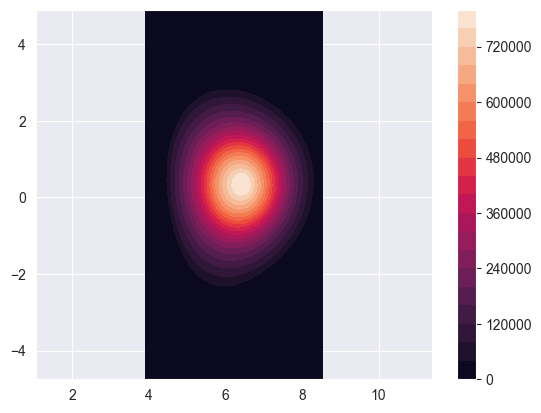

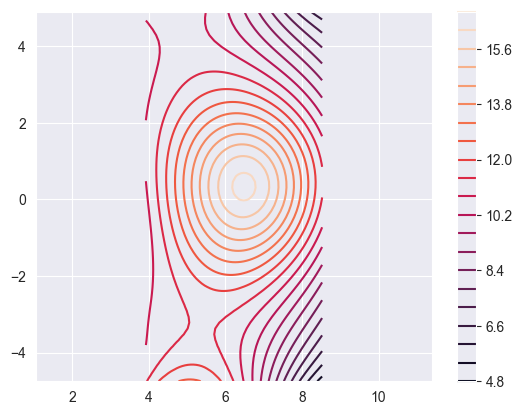

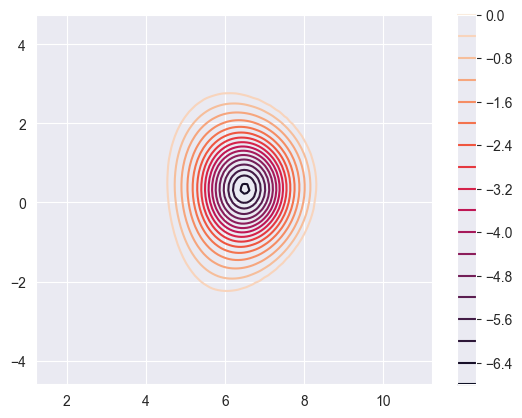

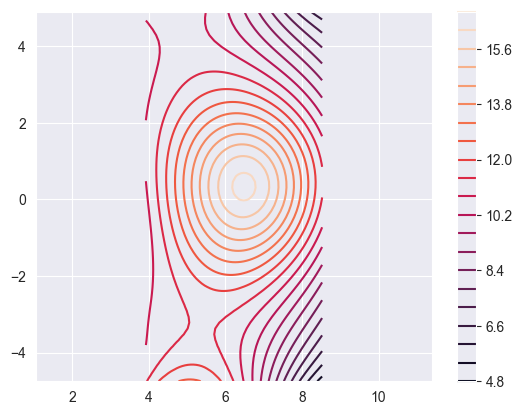

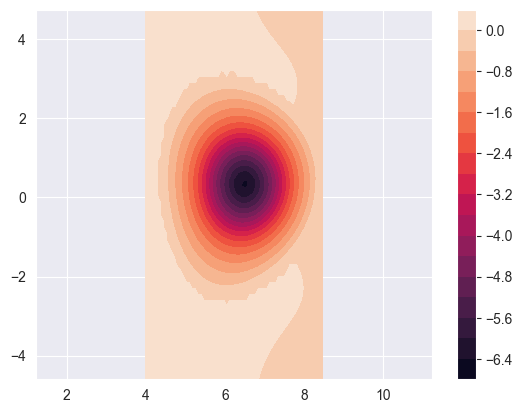

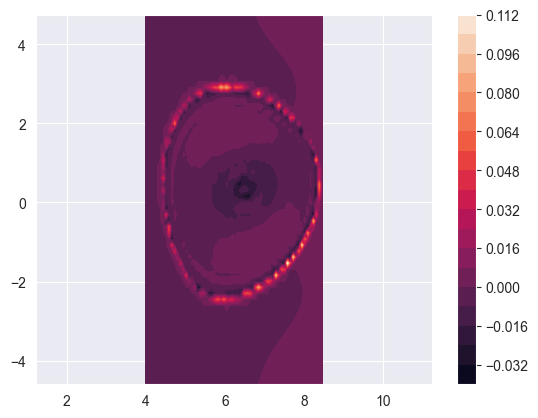

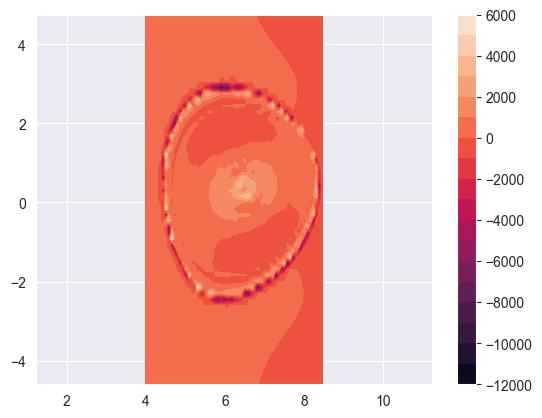

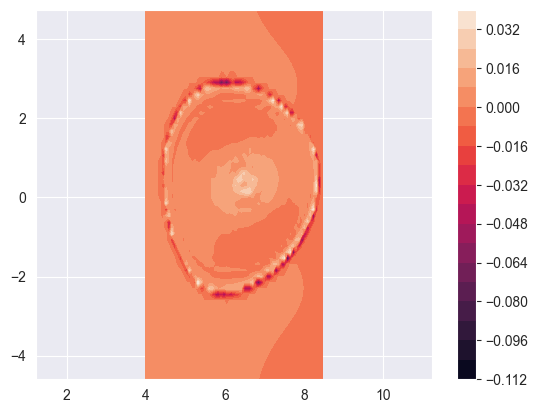

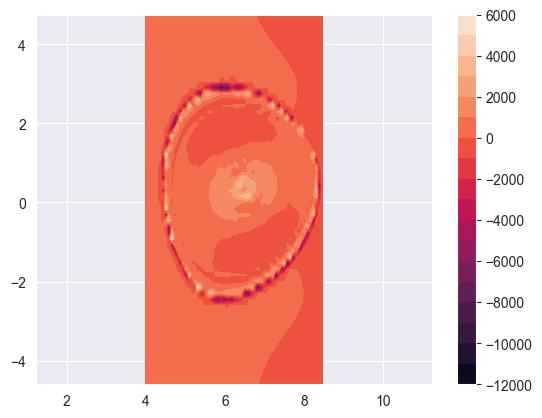

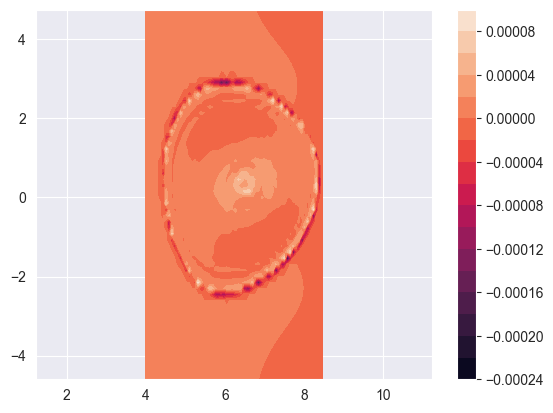

time: 2.13 s (started: 2023-10-03 08:23:08 +02:00)


In [47]:
'''
###############################################################################
PINN convolutional model - Jacobi iteration
'''

mu0 = 4*np.pi*1e-7

hr = RR_pixels[1,2] - RR_pixels[1,1];
hz = ZZ_pixels[2,1] - ZZ_pixels[1,1];



RR_in = RR_pixels[1:-1,1:-1]
ZZ_in = ZZ_pixels[1:-1,1:-1]


RHS_i = DB_res_RHS_pixel_test_ConvNet[0,:,:]
psi_i = y_data_load[0,:,:]
jphi_i = DB_Jpla_pixel_test_ConvNet[0,:,:]

# RHS_i = res_RHS_pixel_train[0,:,:]
# psi_i = y_train[0,:,:].numpy()
# jphi_i = RHS_i/(mu0*RR_pixels)


fun_contourf_sol(jphi_i,RR_pixels,ZZ_pixels)
fun_contour_sol(psi_i,RR_pixels,ZZ_pixels)
fun_contour_sol(RHS_i[1:-1,1:-1],RR_in,ZZ_in)
fun_contour_sol(psi_i,RR_pixels,ZZ_pixels)


### compute RHS via comvolution
kr = np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0]))*hz**2;
kz = np.transpose(np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0])))*hr**2;
Laplace_kernel = (kr + kz)/(hr**2*hz**2);

Df_dr_kernel = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr);

Lpsi = signal.convolve2d(psi_i, Laplace_kernel, mode='valid')
# Lpsi = Lpsi/(hr**2*hz**2)
Dpsi_dr = signal.convolve2d(psi_i, Df_dr_kernel, mode='valid')
# LHS_conv = Lpsi - Dpsi_dr/RR_in
GS_ope = Lpsi - Dpsi_dr/RR_in

jphi = -GS_ope/(mu0*RR_in)


fun_contourf_sol(GS_ope,RR_in,ZZ_in)
fun_contourf_sol(RHS_i[1:-1,1:-1]-GS_ope,RR_in,ZZ_in)
fun_contourf_sol(jphi_i[1:-1,1:-1]-jphi,RR_in,ZZ_in)



### Test jacobi iteration via convolution
kr = np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0]))*hz**2;
kz = np.transpose(np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0])))*hr**2;

alfa = -2*(hr**2 + hz**2)
Laplace_kernel = np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 1, hz**2/alfa], [0, hr**2/alfa, 0]));
Df_dr_kernel = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2);

Lpsi = signal.convolve2d(psi_i, Laplace_kernel, mode='valid')
Dpsi_dr = signal.convolve2d(psi_i, Df_dr_kernel, mode='valid')

GS_ope = Lpsi - Dpsi_dr/RR_in
GS_ope = GS_ope*alfa/(hr**2*hz**2)

bb = RHS_i/alfa*(hr**2*hz**2)

fun_contourf_sol(GS_ope - RHS_i[1:-1,1:-1],RR_in,ZZ_in)

jphi_test = -GS_ope/(mu0*RR_in)
fun_contourf_sol(jphi_i[1:-1,1:-1]-jphi_test,RR_in,ZZ_in)





### Convolution operators for jacobi iteration
kr = np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0]))*hz**2;
kz = np.transpose(np.array(([0, 0, 0], [1, -2, 1], [0, 0, 0])))*hr**2;

alfa = -2*(hr**2 + hz**2)
Jacobi_kernel_1 = -np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 0, hz**2/alfa], [0, hr**2/alfa, 0]));
Jacobi_kernel_2 = -np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2);

Lpsi = signal.convolve2d(psi_i, Jacobi_kernel_1, mode='valid')
Dpsi_dr = signal.convolve2d(psi_i, Jacobi_kernel_2, mode='valid')

qq = Lpsi - Dpsi_dr/RR_in + RHS_i[1:-1,1:-1]/alfa*(hr**2*hz**2)


fun_contourf_sol(qq - psi_i[1:-1,1:-1],RR_in,ZZ_in)


### Using TF convolution (tf.nn.conv2d)
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train,res_RHS_pixel_train[:,1:-1,1:-1])).batch(64)

for x_ds, y_ds, RHS_in_ds in train_ds:
    qqq = 0



RR_conv_tensor = tf.convert_to_tensor(RR_pixels, dtype=(DTYPE))
RR_in_conv_tensor = tf.convert_to_tensor(RR_in, dtype=(DTYPE))

Jacobi_kernel_1 = tf.convert_to_tensor(Jacobi_kernel_1, dtype=(DTYPE))
Jacobi_kernel_2 = tf.convert_to_tensor(Jacobi_kernel_2, dtype=(DTYPE))
Jacobi_kernel_1_tensor = tf.expand_dims(tf.expand_dims(Jacobi_kernel_1[::-1, ::-1],axis = -1),axis = -1)
Jacobi_kernel_2_tensor = tf.expand_dims(tf.expand_dims(Jacobi_kernel_2[::-1, ::-1],axis = -1),axis = -1)

Laplace_kernel = tf.convert_to_tensor(Laplace_kernel, dtype=(DTYPE))
Df_dr_kernel = tf.convert_to_tensor(Df_dr_kernel, dtype=(DTYPE))
Laplace_kernel_tensor = tf.expand_dims(tf.expand_dims(Laplace_kernel[::-1, ::-1],axis = -1),axis = -1)
Df_dr_kernel_tensor = tf.expand_dims(tf.expand_dims(Df_dr_kernel[::-1, ::-1],axis = -1),axis = -1)

RR_conv_tensor = tf.expand_dims(tf.expand_dims(RR_conv_tensor,axis = 0),axis = -1)
RR_in_conv_tensor = tf.expand_dims(tf.expand_dims(RR_in_conv_tensor,axis = 0),axis = -1)


Gaussian_kernel = np.array(([1,2,1], [2,4,2], [1,2,1]), dtype=DTYPE)/(16);
Gaussian_kernel = np.array(([1,4,7,4,1],
                            [4,16,26,16,4],
                            [7,26,41,26,7],
                            [4,16,26,16,4],
                            [1,4,7,4,1]), dtype=DTYPE)/(273);
Gauss_tensor = tf.expand_dims(tf.expand_dims(Gaussian_kernel[::-1, ::-1],axis = -1),axis = -1)



def fun_GS_Jacobi_conv_batch(f,RHS_in_ds):
    # Compute GS operator via convolution
    temp_1 = tf.nn.conv2d(f,Jacobi_kernel_1_tensor,strides=[1, 1, 1, 1],padding='VALID')
    temp_2 = tf.nn.conv2d(f,Jacobi_kernel_2_tensor,strides=[1, 1, 1, 1],padding='VALID')
    temp_2 = tf.math.divide(temp_2,RR_in_conv_tensor)

    psi_conv = temp_1[:,:,:,0] - temp_2[:,:,:,0] + RHS_in_ds/alfa*(hr**2*hz**2)

    return psi_conv


def fun_GSoperator_NN_conv_batch(f):
    # Compute GS operator via convolution
    Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

    GS_ope = Lpsi[:,:,:,0] - Dpsi_dr[:,:,:,0]
    GS_ope = GS_ope*alfa/(hr**2*hz**2)

    return GS_ope


def fun_GSoperator_NN_conv_smooth_batch(f):
    # Compute GS operator via convolution
    Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

    GS_ope = Lpsi - Dpsi_dr
    GS_ope = GS_ope*alfa/(hr**2*hz**2)

    GS_ope = tf.nn.conv2d(GS_ope,Gauss_tensor,strides=[1, 1, 1, 1],padding='SAME')
    GS_ope = tf.squeeze(GS_ope,axis = -1)

    return GS_ope


def fun_GSoperator_conv_batch(f):
    # Compute GS operator via convolution
    Lpsi = tf.nn.conv2d(f,Laplace_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.nn.conv2d(f,Df_dr_kernel_tensor,strides=[1, 1, 1, 1],padding='VALID')
    Dpsi_dr = tf.math.divide(Dpsi_dr,RR_in_conv_tensor)

    GS_ope = Lpsi[:,:,:,0] - Dpsi_dr[:,:,:,0]
    GS_ope = GS_ope*alfa/(hr**2*hz**2)
    jphi = -GS_ope/(mu0*RR_in)

    return GS_ope, jphi


# Compute GS operator via convolution
# f = tf.expand_dims(y_ds,axis = -1)
# temp_1 = tf.nn.conv2d(f,Jacobi_kernel_1_tensor,strides=[1, 1, 1, 1],padding='VALID')
# temp_2 = tf.nn.conv2d(f,Jacobi_kernel_2_tensor,strides=[1, 1, 1, 1],padding='VALID')
# temp_2 = tf.math.divide(temp_2,RR_in_conv_tensor)

# psi_i_conv = temp_1[:,:,:,0] + temp_2[:,:,:,0] + RHS_in_ds

# psi_i_conv = temp_1[:,:,:,0] - temp_2[:,:,:,0] + RHS_in_ds/alfa*(hr**2*hz**2)


# fun_contourf_sol(psi_i_conv[0,:,:] - f[0,1:-1,1:-1,0],RR_in,ZZ_in)



In [53]:
RHS_in_ds.shape

TensorShape([52, 30, 30])

time: 1.45 ms (started: 2023-10-03 08:25:07 +02:00)


In [55]:

f = tf.expand_dims(y_ds,axis = -1)
psi_conv = fun_GS_Jacobi_conv_batch(f,RHS_in_ds)
GS_ope, jphi = fun_GSoperator_conv_batch(f)

fun_contourf_sol(psi_conv[0,:,:],RR_in,ZZ_in)
fun_contourf_sol(GS_ope[0,:,:] - RHS_in_ds[0,:,:],RR_in,ZZ_in)


InvalidArgumentError: {{function_node __wrapped__RealDiv_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [52,30,30,1] vs. [1,62,62,1] [Op:RealDiv] name: 

time: 31.3 ms (started: 2023-10-03 08:25:26 +02:00)


In [117]:
# scaler_r = StandardScaler()
# scaler_z = StandardScaler()
# scaler_r.fit(RR_pixels.reshape(-1,1))
# scaler_z.fit(ZZ_pixels.reshape(-1,1))
# RR_pixels_scaled = scaler_r.transform(RR_pixels.reshape(-1,1)).reshape(RR_pixels.shape)
# ZZ_pixels_scaled = scaler_z.transform(ZZ_pixels.reshape(-1,1)).reshape(RR_pixels.shape)

# RR_pixels_scaled = np.tile(RR_pixels_scaled,(X_train.shape[0],1,1))
# ZZ_pixels_scaled = np.tile(ZZ_pixels_scaled,(X_train.shape[0],1,1))

# RR_pixels_scaled = tf.convert_to_tensor(RR_pixels_scaled, dtype=(DTYPE))
# ZZ_pixels_scaled = tf.convert_to_tensor(ZZ_pixels_scaled, dtype=(DTYPE))

# RR_pixels_scaled = tf.expand_dims(RR_pixels_scaled,axis=-1)
# ZZ_pixels_scaled = tf.expand_dims(ZZ_pixels_scaled,axis=-1)


time: 567 µs (started: 2023-10-02 21:52:42 +02:00)


In [181]:
print(X_train.shape,
      y_train.shape,
      res_RHS_pixel_train[:,1:-1,1:-1].shape,
      RR_pixel_train.shape,
      ZZ_pixel_train.shape,
      )

(70000, 302) (70000, 64, 64) (70000, 62, 62) (70000, 64, 64) (70000, 64, 64)
time: 62.2 ms (started: 2023-10-02 23:14:45 +02:00)


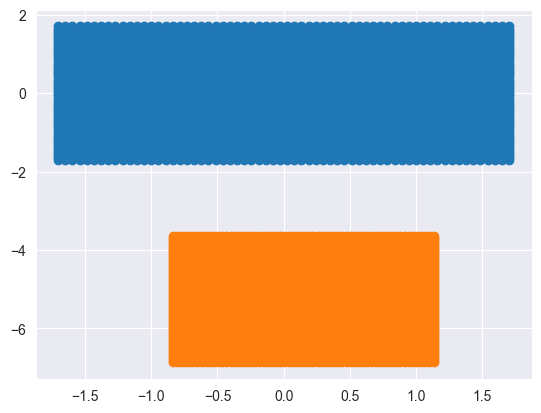

time: 118 ms (started: 2023-10-02 23:46:35 +02:00)


In [201]:
RR_pixel_train[-1,:,:]
plt.figure()
plt.scatter(RR_pixel_train[0,:,:].numpy().ravel(),ZZ_pixel_train[0,:,:].numpy().ravel())
ind = 35000
plt.scatter(RR_pixel_train[ind,:,:].numpy().ravel(),ZZ_pixel_train[ind,:,:].numpy().ravel())

In [182]:

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train,
     y_train,
     res_RHS_pixel_train[:,1:-1,1:-1],
     RR_pixel_train,
     ZZ_pixel_train,
     )).shuffle(42).batch(batch_size)


time: 75.4 ms (started: 2023-10-02 23:14:57 +02:00)


In [192]:
# tf.data.Dataset.save(train_ds, 'data_super_res.data')

time: 10.3 s (started: 2023-10-02 23:34:10 +02:00)


In [183]:
model = PlaNet_Equil_Neural_Opt()
optimizer = tf.keras.optimizers.Adam()
learning_rate_MSE  = 1
learning_rate_Grad = 1
learning_rate_PDE  = 1

def loss_fun_all(y_ds, predictions,RHS_in_ds,learning_rate_PDE,learning_rate_Grad):
    loss_MSE = loss_fun_MSE(y_ds, predictions)
    loss_PDE = loss_fun_PDE(y_ds, predictions,RHS_in_ds)
    return learning_rate_MSE*loss_MSE + learning_rate_PDE*loss_PDE

def loss_fun_MSE(y_ds, predictions):
    loss_MSE = tf.reduce_mean(tf.square(y_ds - tf.squeeze(predictions)))
    return loss_MSE

def loss_fun_PDE(y_ds,predictions,RHS_in_ds):
    GS_ope_ref = RHS_in_ds
    GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch(predictions)
    # GS_ope_ds = fun_GSoperator_NN_conv_batch(predictions)
    # GS_ope_ref = fun_GSoperator_NN_conv_batch(tf.expand_dims(y_ds, axis=-1))

    loss_PDE = tf.reduce_mean(tf.square(GS_ope_ref - GS_ope_ds))
    return loss_PDE

# def loss_fun_PDE_Jacobi(y_ds,predictions,RHS_in_ds):
#     psi_ref = y_ds[:,1:-1,1:-1]
#     psi_conv = fun_GS_Jacobi_conv_batch(predictions,RHS_in_ds)

#     loss_PDE = tf.reduce_mean(tf.square(psi_ref - psi_conv))
#     return loss_PDE


@tf.function
def train_step(x_ds,y_ds,RHS_in_ds,RR_ds,ZZ_ds,learning_rate_PDE,learning_rate_Grad):
    with tf.GradientTape() as tape:
        predictions = model([x_ds,RR_ds,ZZ_ds])
        loss = loss_fun_all(y_ds,predictions,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss


def fun_initialize_history(model,X_train,y_train,res_RHS_pixel_train):
    history = []
    RHS_in = res_RHS_pixel_train[:,1:-1,1:-1]
    predictions = tf.convert_to_tensor(model.predict(X_train))
    loss_0 = tf.reduce_mean(loss_fun_MSE(y_train, predictions) +
                            loss_fun_PDE(y_train, predictions,RHS_in))
    history.append(loss_0)
    return history

history = []

time: 107 ms (started: 2023-10-02 23:15:00 +02:00)


In [184]:
# x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds = iter(train_ds).next()

# predictions = model([x_ds, RR_ds, ZZ_d])

# train_step(x_ds,y_ds,RHS_in_ds,RR_ds,ZZ_ds,learning_rate_PDE,learning_rate_Grad)

time: 167 µs (started: 2023-10-02 23:15:03 +02:00)


In [185]:
opt = tf.keras.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
manager = tf.train.CheckpointManager(ckpt, './gdrive/MyDrive/Colab_Notebooks/tf_neuralop_ckpts', max_to_keep=2)

time: 5.48 ms (started: 2023-10-02 23:15:03 +02:00)


In [186]:
# The following training loop creates an instance of the model and of an optimizer,
# then gathers them into a tf.train.Checkpoint object. It calls the training step
# in a loop on each batch of data, and periodically writes checkpoints to disk.

def train_and_checkpoint(net, manager):
  ckpt.restore(manager.latest_checkpoint)
  if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
  else:
    print("Initializing from scratch.")

time: 446 µs (started: 2023-10-02 23:15:04 +02:00)


In [187]:
policy = mixed_precision.Policy('float32') # float32, mixed_float16
mixed_precision.set_global_policy(policy)

time: 610 µs (started: 2023-10-02 23:15:05 +02:00)


In [188]:
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

Compute dtype: float32
Variable dtype: float32
time: 321 µs (started: 2023-10-02 23:15:06 +02:00)


In [189]:
import os
os.getcwd()

'/Users/matte/Dropbox/PhD/RESEARCH_ACTIVITY/ML/Equilibrium_ML/Physics_Informed_AI_plasma_equilibrium'

time: 1.69 ms (started: 2023-10-02 23:15:06 +02:00)


In [190]:
train_and_checkpoint(model, manager)

Restored from ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_ckpts/ckpt-6
time: 29.8 ms (started: 2023-10-02 23:15:07 +02:00)


In [191]:
@tf.function
def train_step(x_ds,y_ds,RHS_in_ds,RR_ds,ZZ_ds,learning_rate_PDE,learning_rate_Grad):
    with tf.GradientTape() as tape:
        predictions = model([x_ds,RR_ds,ZZ_ds])
        loss = loss_fun_all(y_ds,predictions,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# model = eq_model_v3()
print_every_epoch = 25
epochs = 500
optimizer = tf.keras.optimizers.Adam() # poor performances
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
# optimizer = tf.keras.optimizers.Adam(learning_rate=.0005)




for i in range(7):
    training_time_start = time.time()
    for epoch in range(epochs):
        t_start = time.time()
        loss_epoch = []
        for x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds in train_ds:
            loss = train_step(x_ds,y_ds,RHS_in_ds,RR_ds,ZZ_ds,learning_rate_PDE,learning_rate_Grad)
            loss_epoch.append(loss)

        loss = np.mean(np.asarray(loss_epoch))
        epoch_time = time.time() - t_start

        history.append(loss)
        ckpt.step.assign_add(1)
        if epoch % print_every_epoch == 0:
            print('epoch {:d}, of {:d}, loss = {:2.2e}, {:d}s/epoch'.format(epoch+1,
                                                              epochs,
                                                              loss,
                                                              int(epoch_time)))
            preds = model([x_ds, RR_ds, ZZ_ds])
            print(loss_fun_MSE(y_ds, preds).numpy(),
                  loss_fun_PDE(y_ds, preds,RHS_in_ds).numpy())

            save_path = manager.save()
            print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))

    total_training_time = time.time() - training_time_start
    print('')
    print('--> Total training time {:d}s'.format(int(total_training_time)))
    print('')
    print('')

    # plt.figure()
    # plt.plot(np.arange(0,len(history)),history, marker = '.')
    # plt.yscale('log')

    dictionary = {'history': history}
    history_name = ('/content/gdrive/MyDrive/history_PlaNet_NeuralOp_65588sample_{:d}epochs.h5'.format(len(history)))
    model_name = ('/content/gdrive/MyDrive/model_PlaNet_NeuralOp_65588sample_{:d}epochs.h5'.format(len(history)))
    scipy.io.savemat(history_name,dictionary)
    model.save(model_name)
    # files.download(model_name)
    # files.download(history_name)



# folder = os.path.join(r"/Users/matte/Dropbox/PhD/RESEARCH_ACTIVITY/ML/Equilibrium_ML")
# model.save(os.path.join(folder + r'/PlaNet_equlibrium_onlypla_scaled.h5'))

# dictionary = {'history': history,
#               'id_train': id_train,
#               'id_test': id_test}
# scipy.io.savemat(os.path.join(folder + r'/PlaNet_equlibrium_onlypla_scaled_files.h5'), dictionary)


plt.figure()
plt.plot(np.arange(0,len(history)),history, marker = '.')
plt.yscale('log')


# from google.colab import drive
# drive.mount('/content/gdrive')
model.save('/content/gdrive/MyDrive/tmp_model.h5')
# model.save('PlaNet_equlibrium_onlypla_scaled_smooth.h5')


epoch 1, of 500, loss = 1.77e+01, 94s/epoch
6.354965 11.313504
Saved checkpoint for step 128: ./gdrive/MyDrive/Colab_Notebooks/tf_neuralop_ckpts/ckpt-7


KeyboardInterrupt: 

time: 4min 46s (started: 2023-10-02 23:15:08 +02:00)


In [ ]:
dictionary = {'history': history}
scipy.io.savemat('/content/gdrive/MyDrive/history_PlaNet_NeuralOp_65588_2',dictionary)
model.save('/content/gdrive/MyDrive/model_PlaNet_NeuralOp_65588_2.h5')

time: 995 ms (started: 2023-09-29 16:25:54 +00:00)


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# model.save('/content/gdrive/MyDrive/PlaNet_equlibrium_onlypla_scaled_smooth.h5')
# model.save('PlaNet_equlibrium_onlypla_scaled_smooth.h5')

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
dictionary = {'history': history}
scipy.io.savemat('/content/gdrive/MyDrive/history_PlaNet_Equil_kin_65588sample',dictionary)
model.save('/content/gdrive/MyDrive/model_PlaNet_Equil_kin_65588sample.h5')

# tmp_scaler = {'scaler':scaler}
# import pickle
# pickle.dump(tmp_scaler, open('/content/gdrive/MyDrive/tmp_scaler','wb'))

dictionary = {'X_train': X_train.numpy(),
              'y_train': y_train.numpy(),
              'X_test': X_test.numpy(),
              'y_test': y_test.numpy(),
              'id_train': id_train,
              'id_test': id_test}
# scipy.io.savemat('/content/gdrive/MyDrive/data_PlaNet_Equil_kin_65588sample',dictionary)





In [ ]:


# from google.colab import files
# files.download('/content/gdrive/MyDrive/history_PlaNet_Equil_65588sample_2500epochs')
# files.download('/content/gdrive/MyDrive/model_PlaNet_Equil_65588sample_2500epochs.h5')
# files.download('/content/gdrive/MyDrive/tmp_scaler')
# files.download('/content/gdrive/MyDrive/tmp_data')


(0.001, 30)

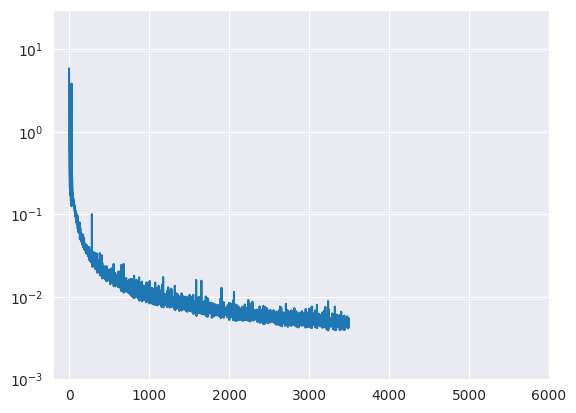

time: 501 ms (started: 2023-09-29 16:26:01 +00:00)


In [ ]:
plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')
plt.xlim([-200,6000])
plt.ylim([.001,30
])

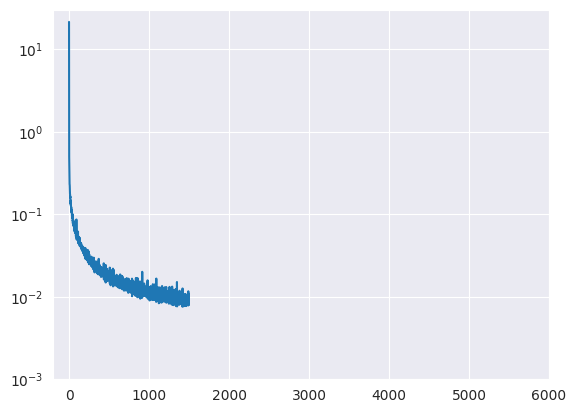

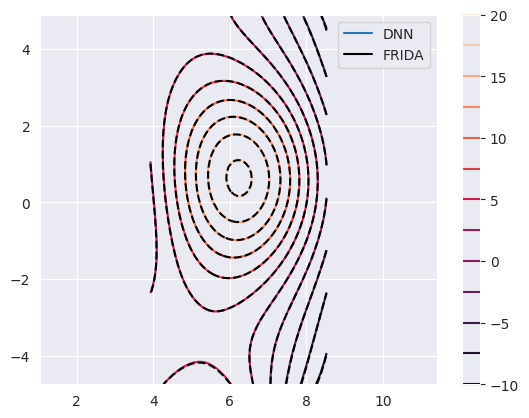

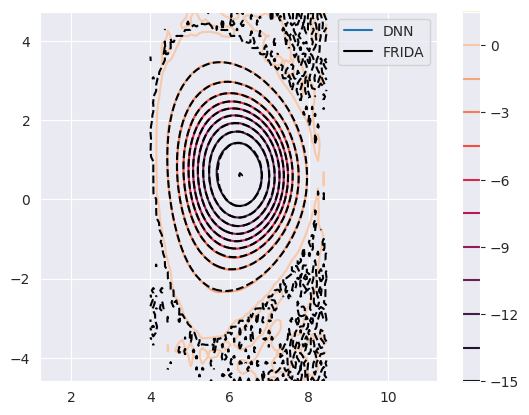

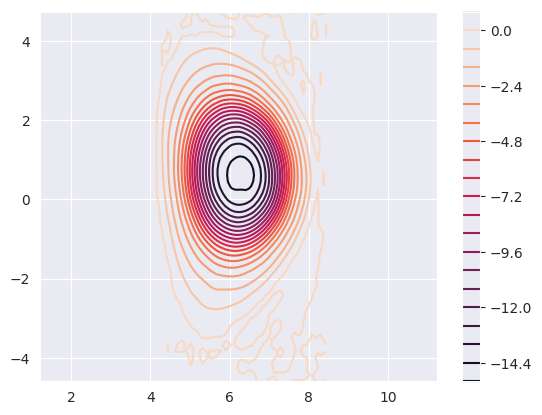

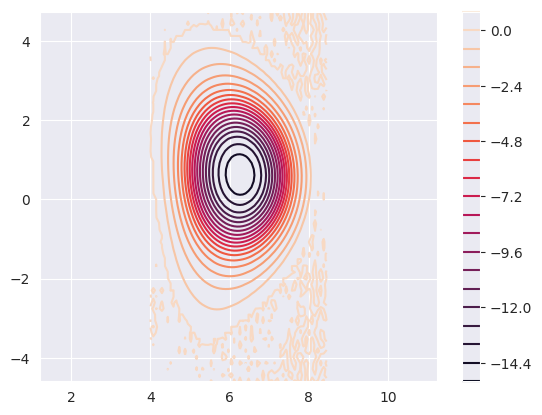

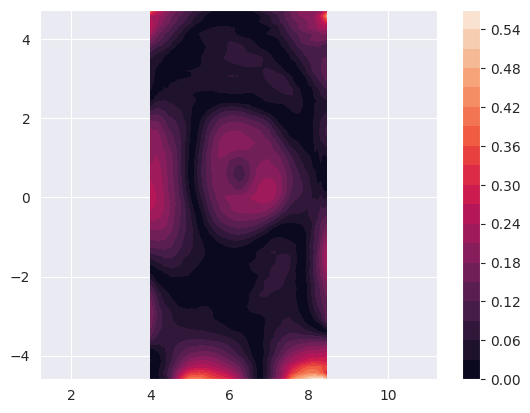

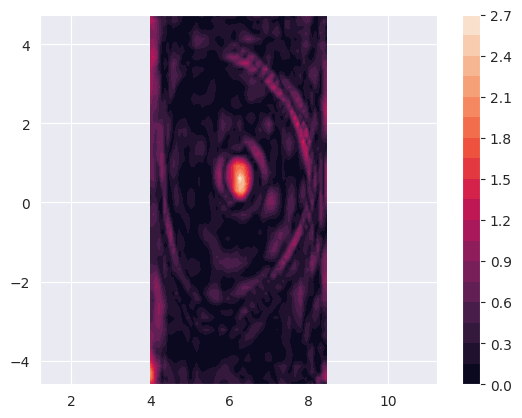

time: 2.33 s (started: 2023-09-01 23:18:13 +00:00)


In [ ]:
plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')
plt.xlim([-200,6000])
plt.ylim([.001,30
])

history_bkp = history

ind_plot = 2900
qq_ref = y_train[ind_plot,:,:].numpy()
qq_NN = np.squeeze(model(X_train[ind_plot:ind_plot+1,:]).numpy())
RHS_ref = res_RHS_pixel_train[ind_plot,:,:].numpy()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# sur1 = ax.contour(RR_pixels,ZZ_pixels, qq_ref, 10, cmap=cm.coolwarm,
#                         linewidth=0, antialiased=False)
# surf2 = ax.contour(RR_pixels,ZZ_pixels, qq_NN, 10, colors = 'black', linestyles = 'dashed',
#                         linewidth=0, antialiased=False)





# prediction = model(x_ds)
# loss = loss_fun_all(y_ds,prediction,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
# loss_fun_MSE(y_ds, model(x_ds)).numpy()
# loss_fun_PDE(y_ds, model(x_ds),RHS_in_ds).numpy()



f1 = tf.expand_dims(tf.expand_dims(qq_NN,axis = 0),axis = -1)
f2 = tf.expand_dims(tf.expand_dims(qq_ref,axis = 0),axis = -1)
# f2 = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = -1)
# GS_ope_ref = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = 0)

# psi_conv = fun_GS_Jacobi_conv_batch(f1,f2)
GS_ope, jphi = fun_GSoperator_conv_batch(f1)
GS_ope_ref = fun_GSoperator_NN_conv_batch(f2)

GS_ope = fun_GSoperator_NN_conv_smooth_batch(f1)

fun_contour_compare_sol(qq_ref,qq_NN,RR_pixels,ZZ_pixels)
fun_contour_compare_sol(GS_ope_ref[0,:,:],GS_ope[0,:,:],RR_in,ZZ_in)


fun_contour_sol(GS_ope[0,:,:],RR_in,ZZ_in)
fun_contour_sol(GS_ope_ref[0,:,:],RR_in,ZZ_in)

fun_contourf_sol(100*np.abs(qq_ref[1:-1,1:-1] - qq_NN[1:-1,1:-1])/np.max(np.abs(qq_ref[1:-1,1:-1])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

fun_contourf_sol(100*np.abs(GS_ope_ref[0,:,:] - GS_ope[0,:,:])/np.max(np.abs(GS_ope_ref[0,:,:])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

In [ ]:
  plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')

history_bkp = history

ind_plot = 2900
qq_ref = y_train[ind_plot,:,:].numpy()
qq_NN = np.squeeze(model(X_train[ind_plot:ind_plot+1,:]).numpy())
RHS_ref = res_RHS_pixel_train[ind_plot,:,:].numpy()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# sur1 = ax.contour(RR_pixels,ZZ_pixels, qq_ref, 10, cmap=cm.coolwarm,
#                         linewidth=0, antialiased=False)
# surf2 = ax.contour(RR_pixels,ZZ_pixels, qq_NN, 10, colors = 'black', linestyles = 'dashed',
#                         linewidth=0, antialiased=False)





# prediction = model(x_ds)
# loss = loss_fun_all(y_ds,prediction,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
# loss_fun_MSE(y_ds, model(x_ds)).numpy()
# loss_fun_PDE(y_ds, model(x_ds),RHS_in_ds).numpy()



f1 = tf.expand_dims(tf.expand_dims(qq_NN,axis = 0),axis = -1)
f2 = tf.expand_dims(tf.expand_dims(qq_ref,axis = 0),axis = -1)
# f2 = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = -1)
# GS_ope_ref = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = 0)

# psi_conv = fun_GS_Jacobi_conv_batch(f1,f2)
GS_ope, jphi = fun_GSoperator_conv_batch(f1)
GS_ope_ref = fun_GSoperator_NN_conv_batch(f2)
GS_ope_ref = RHS_ref[1:-1,1:-1]

GS_ope = fun_GSoperator_NN_conv_smooth_batch(f1)

fun_contour_compare_sol(qq_ref,qq_NN,RR_pixels,ZZ_pixels)
fun_contour_compare_sol(GS_ope_ref[:,:],GS_ope[0,:,:],RR_in,ZZ_in)


fun_contour_sol(GS_ope[0,:,:],RR_in,ZZ_in)
fun_contour_sol(GS_ope_ref[:,:],RR_in,ZZ_in)

fun_contourf_sol(100*np.abs(qq_ref[1:-1,1:-1] - qq_NN[1:-1,1:-1])/np.max(np.abs(qq_ref[1:-1,1:-1])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

fun_contourf_sol(100*np.abs(GS_ope_ref[:,:] - GS_ope[0,:,:])/np.max(np.abs(GS_ope_ref[:,:])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

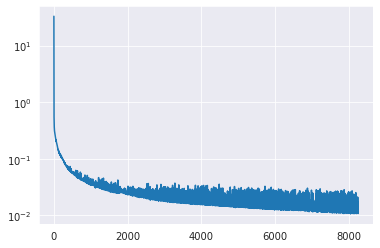

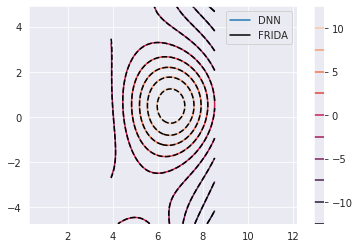

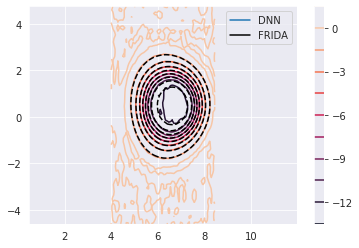

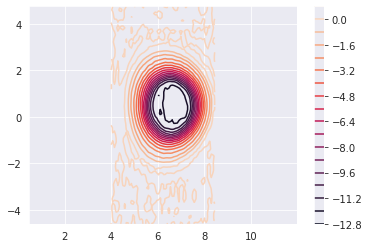

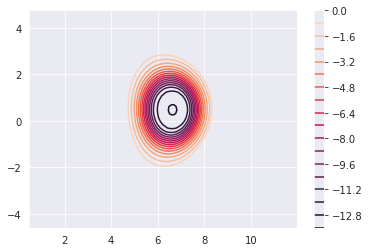

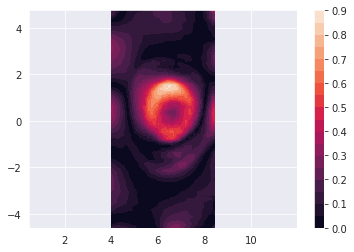

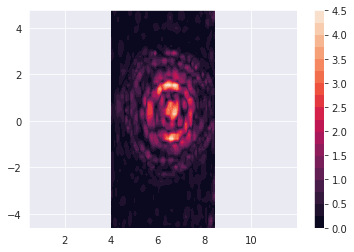

In [ ]:
 plt.figure()
plt.plot(np.arange(0,len(history)),history)
plt.yscale('log')

history_bkp = history

ind_plot = 2900
qq_ref = y_train[ind_plot,:,:].numpy()
qq_NN = np.squeeze(model(X_train[ind_plot:ind_plot+1,:]).numpy())
RHS_ref = res_RHS_pixel_train[ind_plot,:,:].numpy()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# sur1 = ax.contour(RR_pixels,ZZ_pixels, qq_ref, 10, cmap=cm.coolwarm,
#                         linewidth=0, antialiased=False)
# surf2 = ax.contour(RR_pixels,ZZ_pixels, qq_NN, 10, colors = 'black', linestyles = 'dashed',
#                         linewidth=0, antialiased=False)





# prediction = model(x_ds)
# loss = loss_fun_all(y_ds,prediction,RHS_in_ds,learning_rate_PDE,learning_rate_Grad)
# loss_fun_MSE(y_ds, model(x_ds)).numpy()
# loss_fun_PDE(y_ds, model(x_ds),RHS_in_ds).numpy()



f1 = tf.expand_dims(tf.expand_dims(qq_NN,axis = 0),axis = -1)
f2 = tf.expand_dims(tf.expand_dims(qq_ref,axis = 0),axis = -1)
# f2 = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = -1)
# GS_ope_ref = tf.expand_dims(RHS_ref[1:-1,1:-1],axis = 0)

# psi_conv = fun_GS_Jacobi_conv_batch(f1,f2)
GS_ope, jphi = fun_GSoperator_conv_batch(f1)
GS_ope_ref = fun_GSoperator_NN_conv_batch(f2)
GS_ope_ref = RHS_ref[1:-1,1:-1]

GS_ope = fun_GSoperator_NN_conv_smooth_batch(f1)

fun_contour_compare_sol(qq_ref,qq_NN,RR_pixels,ZZ_pixels)
fun_contour_compare_sol(GS_ope_ref[:,:],GS_ope[0,:,:],RR_in,ZZ_in)


fun_contour_sol(GS_ope[0,:,:],RR_in,ZZ_in)
fun_contour_sol(GS_ope_ref[:,:],RR_in,ZZ_in)

fun_contourf_sol(100*np.abs(qq_ref[1:-1,1:-1] - qq_NN[1:-1,1:-1])/np.max(np.abs(qq_ref[1:-1,1:-1])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])

fun_contourf_sol(100*np.abs(GS_ope_ref[:,:] - GS_ope[0,:,:])/np.max(np.abs(GS_ope_ref[:,:])),
                 RR_pixels[1:-1,1:-1],
                 ZZ_pixels[1:-1,1:-1])